-----------------------------------------------
# Exercício


Para todos os desafios você precisará consultar a base que foi fornecida no grupo "Trilha de Formação BOT CIA".


## Desafio 1

Tipo de gráfico LIVRE (você escolhe). Faça um gráfico  agrupando valores soma de "QT_LIQUIDO" por "CD_FREN_TRAN"

**O objetivo desse gráfico é:** Demonstrar quais são as frentes mais produtivas.

**OBS:** Deixe em ordem crescente de acordo com a produtividade (Menor para o maior).

**ATENÇÃO** Limite para mostrar somente as 7 frentes mais produtivas!

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r'/content/Ton_Cana _Atividade9.xlsx')
display(df)

,instancia,CD_FREN_TRAN,DE_FREN_TRAN,fazenda,zona,talhao,data_hora,data,hora,Início da Hora,QT_LIQUIDO,QT_LIQUIDO_AN,QT_LIQUIDO_AN_VEG,raio_medio,pond_1,pond_2,pond_3,CONTAGEM_CARGAS
0,BARRA,203,BARRA F 203 B3 MEC,90015,137,12,2024-04-23 01:42:36,2024-04-23,01:42:36,01:00:00,59240,59240,0,30.0,888600,522046.0,0.0,2
1,BARRA,203,BARRA F 203 B3 MEC,90034,275,2,2024-04-22 02:32:18,2024-04-22,02:32:18,02:00:00,32070,0,0,23.0,737610,0.0,0.0,1
2,BARRA,203,BARRA F 203 B3 MEC,90034,275,2,2024-04-22 06:45:21,2024-04-22,06:45:21,06:00:00,37010,0,0,23.0,851230,0.0,0.0,1
3,BARRA,203,BARRA F 203 B3 MEC,90034,275,2,2024-04-22 06:49:37,2024-04-22,06:49:37,06:00:00,34370,0,0,23.0,790510,0.0,0.0,1
4,BARRA,203,BARRA F 203 B3 MEC,90034,275,2,2024-04-22 15:28:32,2024-04-22,15:28:32,15:00:00,36350,0,0,23.0,836050,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12561,VALER,940,VR- F10 MEC,33693,1,29,2024-04-22 09:54:59,2024-04-22,09:54:59,09:00:00,32720,0,0,19.0,621680,0.0,0.0,1
12562,VALER,940,VR- F10 MEC,33693,1,29,2024-04-22 11:00:14,2024-04-22,11:00:14,11:00:00,69080,0,0,38.0,1312520,0.0,0.0,2
12563,VALER,940,VR- F10 MEC,33693,1,29,2024-04-22 11:53:24,2024-04-22,11:53:24,11:00:00,38020,0,0,19.0,722380,0.0,0.0,1
12564,VALER,940,VR- F10 MEC,33693,1,29,2024-04-22 12:11:09,2024-04-22,12:11:09,12:00:00,71710,0,0,38.0,1362490,0.0,0.0,2


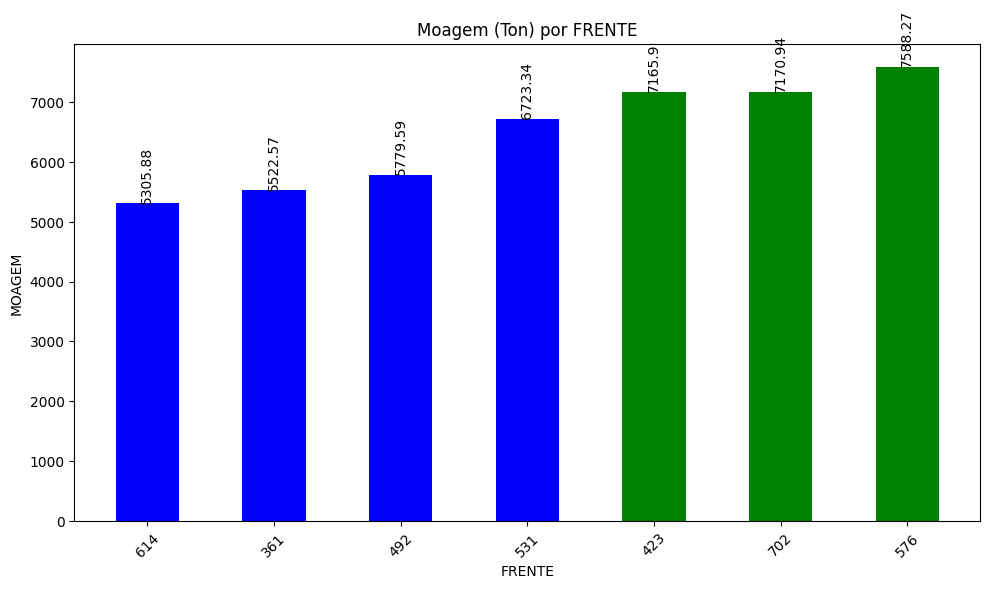

In [123]:
dfg = df.groupby('CD_FREN_TRAN')['QT_LIQUIDO'].sum().reset_index()
dfg['CD_FREN_TRAN'] = dfg['CD_FREN_TRAN'].astype(str)
dfg['QT_LIQUIDO'] = dfg['QT_LIQUIDO']/1000
dfg = dfg.sort_values(by='QT_LIQUIDO', ascending=False)
dfg = dfg.head(7)
dfg = dfg.rename(columns={
    'CD_FREN_TRAN': 'FRENTE',
    'QT_LIQUIDO': 'TONELADAS'})
dfg = dfg.sort_values(by='TONELADAS', ascending=True)
colors = ['green' if i > 3 else 'blue' for i in range(len(dfg))]

plt.figure(figsize=(10, 6))
bars = plt.bar(dfg['FRENTE'], dfg['TONELADAS'], color=colors, width=0.5)
plt.xlabel('FRENTE')
plt.ylabel('MOAGEM')
plt.title('Moagem (Ton) por FRENTE')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()





---


## Desafio 2

Você vai escolher o tipo do gráfico e o que vai plotar.

**O objetivo desse gráfico é:** Um gestor de frente da Vale do Rosário precisa saber qual frente está recebendo mais e menos caminhões por hora, crie um gráfico que ajude ele a ter essa visão.

Digite a data [YYYY-MM-DD]: 2024-04-22


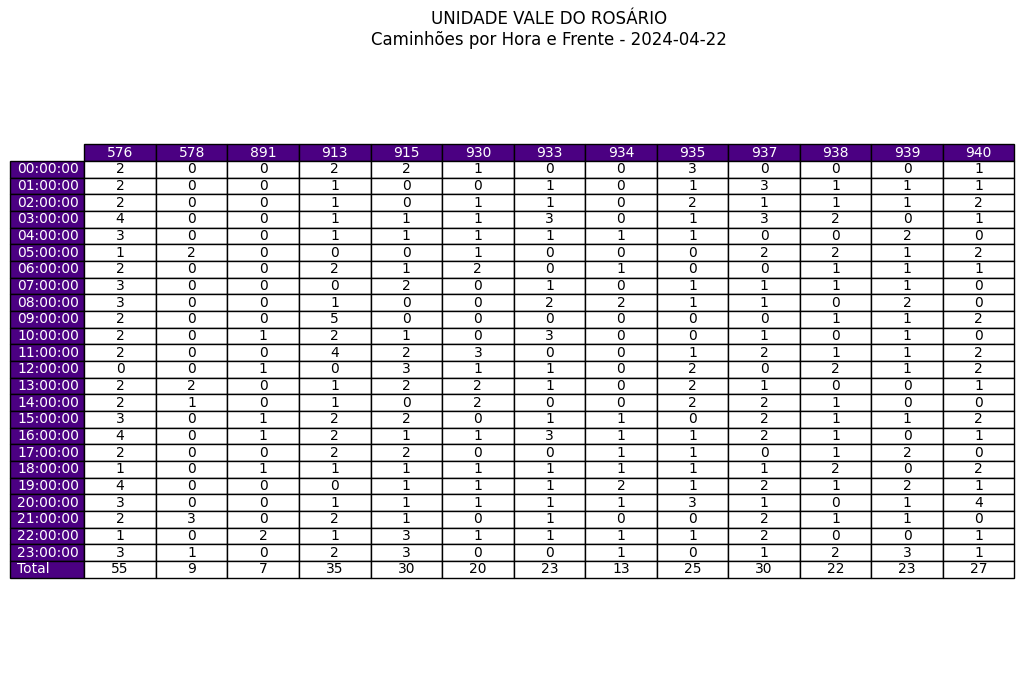

In [115]:

df_valer = df[df['instancia'] == 'VALER']
df_valer = df_valer.groupby(['data', 'CD_FREN_TRAN', 'Início da Hora'], as_index=False)['CONTAGEM_CARGAS'].sum()
df_valer = df_valer.rename(columns={
    'data': 'DATA',
    'CD_FREN_TRAN': 'FRENTE',
    'Início da Hora': 'HORA',
    'CONTAGEM_CARGAS': 'CAMINHÕES'
})
df_valer['CAMINHÕES'] = (df_valer['CAMINHÕES'] / 2).astype(int)

input_data = pd.to_datetime(input("Digite a data [YYYY-MM-DD]: "))
df_filtered = df_valer[df_valer['DATA'] == input_data]

pivot_table = df_filtered.pivot_table(
    index='HORA',
    columns='FRENTE',
    values='CAMINHÕES',
    aggfunc='sum',
    fill_value=0
)

soma_total = pivot_table.sum(numeric_only=True)
soma_total = soma_total.rename('Total')
pivot_table = pd.concat([pivot_table, soma_total.to_frame().T])

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=pivot_table.values,
                 colLabels=pivot_table.columns,
                 rowLabels=pivot_table.index,
                 cellLoc='center',
                 loc='center',
                 colColours=['#4B0082']*len(pivot_table.columns),
                 rowColours=['#4B0082']*(len(pivot_table.index)+1))

header_color = '#4B0082'
header_text_color = 'white'
index_text_color = 'white'
total_row_color = '#f2f2f2'

for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_facecolor(header_color)
        cell.set_text_props(color=header_text_color)
    elif key[1] == len(pivot_table.columns):
        cell.set_facecolor(total_row_color)
    elif key[0] > 0 and key[1] == -1:
        cell.set_text_props(color=index_text_color)
    else:
        cell.set_text_props(color='black')

plt.title('''UNIDADE VALE DO ROSÁRIO
Caminhões por Hora e Frente - {}'''.format(input_data.date()))
plt.show()



<br>
<br>

-----------------------------------

**Boa sorte**

"Se algo é importante o suficiente, você deve tentar. Mesmo se o resultado provável for o fracasso." — Elon Musk.